# 0.Imports

## 0.1. Importing libraries

In [1]:
import numpy  as np
import pandas as pd
import warnings
import datetime
import inflection
import matplotlib.pyplot as plt
import seaborn as sns

## 0.2. Loading data

In [2]:
# Importar os datasets
df_train_raw = pd.read_csv('../datasets/train.csv', low_memory=False)

## 0.3. Helper functions

In [3]:
# Função para renomear as colunas do dataframe
def rename_columns(cols):
    title = lambda x: inflection.titleize(x)
    snakecase = lambda x: inflection.underscore(x)
    spaces = lambda x: x.replace( " ", "" )
    cols = list(map( title, cols ))
    cols = list(map( spaces, cols )) 
    cols = list(map( snakecase, cols ))
    return cols 

# 1. PASSO 01 - DATA DESCRIPTION

In [4]:
df1 = df_train_raw.copy()

## 1.1. Rename Columns

In [5]:
df1.columns = rename_columns(df1.columns)

## 1.2. Data Dimensions

In [6]:
print('Number of Rows: {:,}'.format(df1.shape[0]))
print('Number of Columns: {:,}'.format(df1.shape[1]))

Number of Rows: 381,109
Number of Columns: 12


## 1.3. Data Types and description

ATRIBUTO | DESCRIÇÃO | CONTEÚDO
-- | -- | --
id | ID exclusivo para o cliente | único para cada cliente
gender | Gênero do cliente | 'Male', 'Female' 
age | Idade do cliente | min: 20, max: 85
driving_license | Se o cliente tem ou não tem licensa | 0, 1
region_code | Código para a região do cliente | nunique  =  53
previously_insured | Se o cliente já possui Seguro de Veículo | 0, 1
vehicle_age | Idade do Veículo | > 2 Years, 1-2 Year, < 1 Year
vehicle_damage | Se o cliente teve seu veículo danificado no passado | 0, 1
annual_premium | O valor que o cliente pagou à empresa pelo seguro de saúde anual | min: 2,630.0, max: 540,165.0
policy_sales_channel | Código anônimo para o canal de divulgação ao cliente, por exemplo: correio, telefone, pessoalmente, etc. | min: 1.0, max: 163.0
vintage | Número de dias que o cliente se associou à empresa através da compra do seguro de saúde | min:10, max: 299
response | Se o cliente está interessado em contratar | 0, 1

In [7]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.4. Check NA's

In [8]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.5. Descriptive Statics

In [9]:
num_attributes = df1.select_dtypes( include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes( include = ['object'])

### 1.5.1. Numerical Attributes

In [10]:
pd.options.display.float_format = '{:.2f}'.format
num_attributes.describe()

,id,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response
count,381109.00,381109.00,381109.00,381109.00,381109.00,381109.00,381109.00,381109.00,381109.00
mean,190555.00,38.82,1.00,26.39,0.46,30564.39,112.03,154.35,0.12
std,110016.84,15.51,0.05,13.23,0.50,17213.16,54.20,83.67,0.33
min,1.00,20.00,0.00,0.00,0.00,2630.00,1.00,10.00,0.00
25%,95278.00,25.00,1.00,15.00,0.00,24405.00,29.00,82.00,0.00
50%,190555.00,36.00,1.00,28.00,0.00,31669.00,133.00,154.00,0.00
75%,285832.00,49.00,1.00,35.00,1.00,39400.00,152.00,227.00,0.00
max,381109.00,85.00,1.00,52.00,1.00,540165.00,163.00,299.00,1.00


In [11]:
# Central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean )).T
ct2 = pd.DataFrame( num_attributes.apply( np.median )).T

# dispersion - std, min, max, range, skewness, kurtosis
d1 = pd.DataFrame( num_attributes.apply(np.std)).T
d2 = pd.DataFrame( num_attributes.apply(min)).T
d3 = pd.DataFrame( num_attributes.apply(max)).T
d4 = pd.DataFrame( num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame( num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame( num_attributes.apply(lambda x: x.kurtosis())).T

#concat
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skewness', 'kurtosis'] 
m

,attributes,min,max,range,mean,median,std,skewness,kurtosis
0,id,1.00,381109.00,381108.00,190555.00,190555.00,110016.69,0.00,-1.20
1,age,20.00,85.00,65.00,38.82,36.00,15.51,0.67,-0.57
2,driving_license,0.00,1.00,1.00,1.00,1.00,0.05,-21.60,464.35
3,region_code,0.00,52.00,52.00,26.39,28.00,13.23,-0.12,-0.87
4,previously_insured,0.00,1.00,1.00,0.46,0.00,0.50,0.17,-1.97
5,annual_premium,2630.00,540165.00,537535.00,30564.39,31669.00,17213.13,1.77,34.00
6,policy_sales_channel,1.00,163.00,162.00,112.03,133.00,54.20,-0.90,-0.97
7,vintage,10.00,299.00,289.00,154.35,154.00,83.67,0.00,-1.20
8,response,0.00,1.00,1.00,0.12,0.00,0.33,2.30,3.30


### 1.5.2. Categorical Attributes

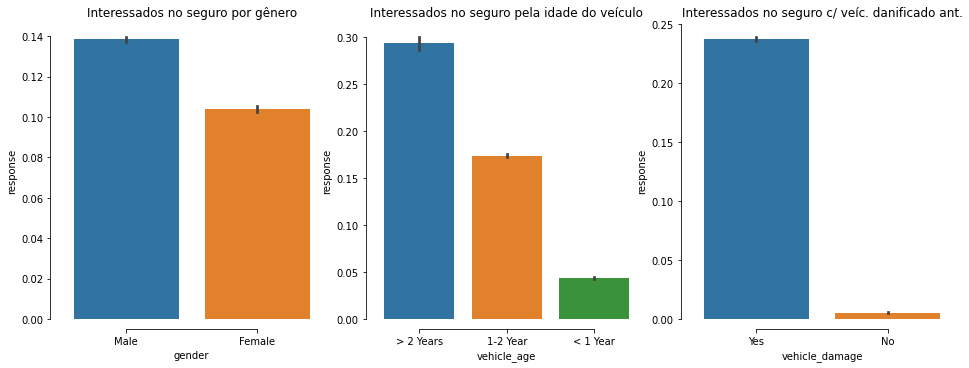

In [12]:
plt.figure(figsize=(16,12))
plt.subplot( 2, 3, 1 )
sns.barplot( x='gender', y='response', data=df1 )
# sns.despine(offset = 10, trim = True)
plt.title('Interessados no seguro por gênero')

plt.subplot( 2, 3, 2 )
sns.barplot( x='vehicle_age', y='response', data=df1 )
sns.despine(offset = 10, trim = True)
plt.title('Interessados no seguro pela idade do veículo')

plt.subplot( 2, 3, 3 )
sns.barplot( x='vehicle_damage', y='response', data=df1 )
sns.despine(offset = 10, trim = True)
plt.title('Interessados no seguro c/ veíc. danificado ant.');

# 2. PASSO 02 - FEATURE ENGINEERING

In [13]:
df2 = df1.copy()

In [14]:
# Converte o conteúdo de 'vehicle_age'
vehicle_age_rename = {'> 2 Years': 'over_2years', '1-2 Year': 'between_1_2years', '< 1 Year': 'below_1_year'}
df2['vehicle_age'] = df2['vehicle_age'].map(vehicle_age_rename)

# Converte o conteúdo de 'vehicle_damage' em números
vehicle_damage_rename = {'No': 0, 'Yes': 1}
df2['vehicle_damage'] = df2['vehicle_damage'].map(vehicle_damage_rename)

# 3. PASSO 03 - EXPLORATORY DATA ANALYSIS (EDA)

In [15]:
df3 = df2.copy()

## 3.1. Análise Univariada

### 3.1.1 Age

## 3.2. Análise Bivariada

## 3.3. Análise Multivariada